In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [43]:
# Membuat list kosong untuk menyimpan data
judul = []
tanggal = []
isi = []
url_list = []
kategori_list = []

In [44]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# # Fungsi untuk mengambil data dari halaman web Detik.com
# def get_data(url, kategori):
#     # Mengirim permintaan HTTP ke url
#     response = requests.get(url)
#     # Mengecek status kode
#     if response.status_code == 200:
#         # Mengubah konten web menjadi objek BeautifulSoup
#         soup = BeautifulSoup(response.content, "html.parser")
#         # Mencari elemen yang berisi data berita
#         articles = soup.find_all("article", class_="list-content__item")
#         # Melakukan iterasi untuk setiap artikel
#         for article in articles:
#             # Mendapatkan link artikel
#             link = article.find("a")["href"]
#             # Mengirim permintaan HTTP ke link artikel
#             article_response = requests.get(link)
#             # Mengecek status kode
#             if article_response.status_code == 200:
#                 # Mengubah konten artikel menjadi objek BeautifulSoup
#                 article_soup = BeautifulSoup(article_response.content, "html.parser")
#                 # Mendapatkan judul artikel
#                 title_element = article_soup.find("h1", class_="detail__title")
#                 title = title_element.text.strip() if title_element else "Title Not Found"
#                 # Mendapatkan tanggal artikel
#                 date_element = article_soup.find("div", class_="detail__date")
#                 date = date_element.text.strip() if date_element else "Date Not Found"
#                 # Mendapatkan isi artikel
#                 content_element = article_soup.find("div", class_="detail__body-text")
#                 content = content_element.text.strip() if content_element else "Content Not Found"
#                 # Menambahkan data ke list
#                 judul.append(title)
#                 tanggal.append(date)
#                 isi.append(content)
#                 url_list.append(link)
#                 kategori_list.append(kategori)
#                 # Mencetak judul artikel
#                 print(title)
#             else:
#                 # Mencetak pesan error jika status kode tidak 200
#                 print(f"Error: {article_response.status_code}")
#     else:
#         # Mencetak pesan error jika status kode tidak 200
#         print(f"Error: {response.status_code}")

# # Membuat list url dan kategori yang akan di-crawl
# base_urls = ["https://sport.detik.com/indeks", "https://health.detik.com/berita-detikhealth/indeks", "https://travel.detik.com/travel-news/indeks","https://www.detik.com/edu/indeks", "https://oto.detik.com/indeks"," https://food.detik.com/indeks","https://finance.detik.com/indeks"]
# categories = ["Olahraga", "Kesehatan", "Pariwisata", "Pendidikan", "Otomotif",'Kuliner','Keuangan']

# # Inisialisasi list untuk menyimpan data
# judul = []
# tanggal = []
# isi = []
# url_list = []
# kategori_list = []

# # Melakukan iterasi untuk setiap url dan kategori
# for base_url, category in zip(base_urls, categories):
#     # Looping untuk beralih halaman
#     for page in range(0, 10):
#         url = f"{base_url}/{page}"
#         # Memanggil fungsi get_data
#         get_data(url, category)

# # Membuat dataframe dari list data
# df = pd.DataFrame({"judul": judul, "tanggal": tanggal, "isi": isi, "url": url_list, "kategori": kategori_list})

# # Menyimpan dataframe ke file csv
# df.to_csv("data_data_berita_detik.csv", index=False)

# # Menampilkan dataframe
# print(df)

In [45]:
df = pd.read_csv('/kaggle/input/data-berita-agak-big/data_data_berita_detik.csv',encoding="ISO-8859-1")

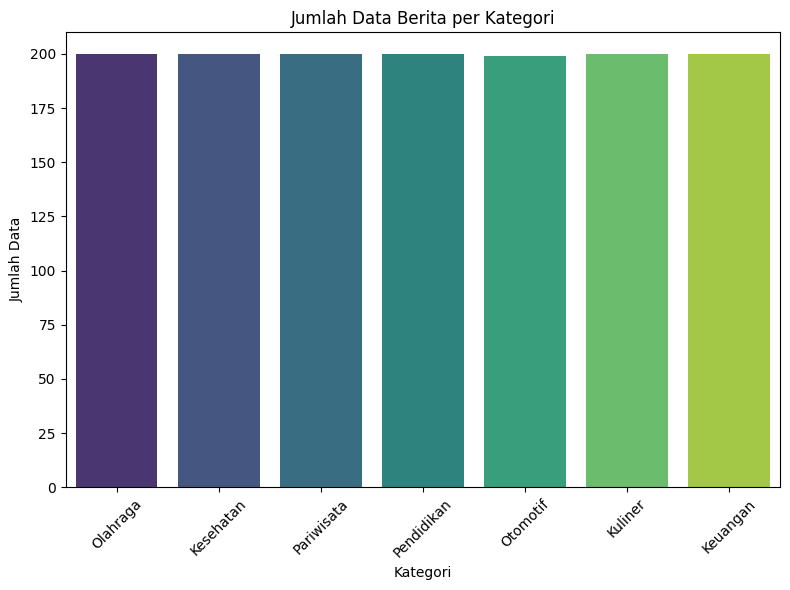

In [46]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='kategori', palette='viridis')
plt.title('Jumlah Data Berita per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
df.sample(5)

,judul,tanggal,isi,url,kategori
992,Kenapa Regulasi Motor Baru MotoGP Mulai Berlak...,"Minggu, 12 Mei 2024 15:09 WIB",Jakarta - Dorna telah mengumumkan regulasi ter...,https://oto.detik.com/motor/d-7336068/kenapa-r...,Otomotif
788,"Bisa Buat Badan Kuyup Saat Hujan, Apakah Air B...","Selasa, 14 Mei 2024 08:30 WIB",Jakarta - Pertanyaan apakah air itu basah tamp...,https://www.detik.com/edu/detikpedia/d-7338302...,Pendidikan
1360,Aturan DMO Minyak Goreng Curah Bakal Dihapus d...,"Jumat, 17 Mei 2024 14:23 WIB",Jakarta - Kementerian Perdagangan (Kemendag) m...,https://finance.detik.com/industri/d-7344988/a...,Keuangan
1013,Mencicipi Taco dari Kedai Kecil Meksiko yang D...,"Sabtu, 18 Mei 2024 17:00 WIB",Meksiko - Sebuah toko taco kecil di Meksiko me...,https://food.detik.com/gallery/d-7346298/menci...,Kuliner
121,Potret Semarak Ribuan Peserta Lari Hijaukan Ba...,"Minggu, 12 Mei 2024 19:06 WIB",Bandung - Sebanyak 3.000 pelari meramaikan Roa...,https://sport.detik.com/fotosport/d-7336494/po...,Olahraga


In [48]:
df.shape

(1399, 5)

In [49]:
df.head(10)

,judul,tanggal,isi,url,kategori
0,"Kalahkan Tyson Fury, Oleksandr Usyk Jadi Raja ...","Minggu, 19 Mei 2024 08:11 WIB",Riyadh - Oleksandr Usyk menjadi raja tinju kel...,https://sport.detik.com/sport-lain/d-7347283/k...,Olahraga
1,Jadwal Thailand Open 2024 Hari Ini: Ana/Tiwi T...,"Minggu, 19 Mei 2024 05:20 WIB",Bangkok - Indonesia menyisakan satu wakil atas...,https://sport.detik.com/raket/d-7347238/jadwal...,Olahraga
2,Kualifikasi GP Emilia Romagna: Asapi Duo McLar...,"Minggu, 19 Mei 2024 02:45 WIB",Imola - Max Versstappen tampil prima untuk mer...,https://sport.detik.com/f1/d-7347226/kualifika...,Olahraga
3,UCI MTB World Eliminator Cup 2024: Pembalap In...,"Sabtu, 18 Mei 2024 23:15 WIB",Jakarta - Sebanyak delapan pembalap sepeda asa...,https://sport.detik.com/sport-lain/d-7347149/u...,Olahraga
4,Veddriq Leonardo Juara Kualifikasi Olimpiade d...,"Sabtu, 18 Mei 2024 21:55 WIB",Shanghai - Atlet panjat tebing Indonesia Veddr...,https://sport.detik.com/sport-lain/d-7347132/v...,Olahraga
5,Thailand Open 2024: Bahagianya Ana/Tiwi Tembus...,"Sabtu, 18 Mei 2024 21:15 WIB",Jakarta - Febriana Dwipuji Kusuma/Amallia Caha...,https://sport.detik.com/raket/d-7347104/thaila...,Olahraga
6,Upaya Menguatkan Kepentingan Basket di Indonesia,"Sabtu, 18 Mei 2024 19:32 WIB",Jakarta - PP Perbasi terancam diadukan ke ke C...,https://sport.detik.com/fotosport/d-7347120/up...,Olahraga
7,Fury Vs Usyk: Siapa Juara Tinju Kelas Berat Se...,"Sabtu, 18 Mei 2024 19:15 WIB",Riyadh - Penentuan siapa juara dunia tinju kel...,https://sport.detik.com/sport-lain/d-7346861/f...,Olahraga
8,Hasil Thailand Open 2024: Ana/Tiwi Melaju ke F...,"Sabtu, 18 Mei 2024 18:22 WIB",Bangkok - Indonesia meloloskan satu wakil gand...,https://sport.detik.com/raket/d-7346900/hasil-...,Olahraga
9,Thailand Open 2024: Rinov/Pitha Tetap Bersyuku...,"Sabtu, 18 Mei 2024 16:45 WIB",Jakarta - Rinov Rivaldy/Pitha Haningtyas Menta...,https://sport.detik.com/raket/d-7346708/thaila...,Olahraga


In [50]:
df.tail()

,judul,tanggal,isi,url,kategori
1394,Pertamina Jamin Stok Avtur Cukup untuk Layani ...,"Jumat, 17 Mei 2024 09:22 WIB",Jakarta - PT Pertamina Patra Niaga akan menjam...,https://finance.detik.com/energi/d-7344406/per...,Keuangan
1395,Jelang Akhir Pekan IHSG Dibuka ke Level 7.246,"Jumat, 17 Mei 2024 09:16 WIB",Jakarta - Indeks Harga Saham Gabungan (IHSG) p...,https://finance.detik.com/bursa-dan-valas/d-73...,Keuangan
1396,"2.000 Pakar Cloud Kumpul di RI, Bahas Industri...","Jumat, 17 Mei 2024 09:14 WIB",Jakarta - Sebanyak 2.000 pakar cloud dan data ...,https://finance.detik.com/berita-ekonomi-bisni...,Keuangan
1397,"Usai Didepak dari Bursa Jepang, Toshiba Bakal ...","Jumat, 17 Mei 2024 09:08 WIB","Jakarta - Raksasa elektronik asal Jepang, Tosh...",https://finance.detik.com/berita-ekonomi-bisni...,Keuangan
1398,Penampakan Jalan Nasional Porak-poranda Imbas ...,"Jumat, 17 Mei 2024 09:05 WIB",Tanah Datar - Jalan nasional Padang - Bukittin...,https://finance.detik.com/foto-bisnis/d-734367...,Keuangan


In [51]:
kategori = pd.get_dummies(df.kategori)
df = pd.concat([df, kategori], axis=1)
df = df.drop(columns='kategori')
df.sample(5)

,judul,tanggal,isi,url,Kesehatan,Keuangan,Kuliner,Olahraga,Otomotif,Pariwisata,Pendidikan
335,Dokter 'Spill' 4 Buah yang Wajib Dikonsumsi un...,"Senin, 13 Mei 2024 20:01 WIB",Daftar Isi\n\n\n\n\r\n\t\t\t\t\t\t\t1. Apel\t\...,https://health.detik.com/berita-detikhealth/d-...,True,False,False,False,False,False,False
939,"Suzuki Swift Baru Meluncur, Harganya Cuma Rp 1...","Selasa, 14 Mei 2024 14:34 WIB",Jakarta - Setelah nongol di sejumlah pameran o...,https://oto.detik.com/mobil/d-7339344/suzuki-s...,False,False,False,False,True,False,False
585,Kecelakaan Bus Pariwisata Angkut Siswa SMK Dep...,"Senin, 13 Mei 2024 11:35 WIB",Jakarta - Kecelakaan bus pariwisata yang menga...,https://travel.detik.com/travel-news/d-7337017...,False,False,False,False,False,True,False
122,Bukannya Bezzecchi Panik Ditempel Marc Marquez,"Minggu, 12 Mei 2024 15:20 WIB",Jakarta - Marco Bezzecchi jatuh di sesi Sprint...,https://sport.detik.com/moto-gp/d-7336074/buka...,False,False,False,True,False,False,False
1045,Seru! 5 Festival Kuliner yang Bisa Didatangi d...,"Sabtu, 18 Mei 2024 11:00 WIB",Jakarta -\n \n Akhir pekan bisa ...,https://food.detik.com/info-kuliner/d-7345269/...,False,False,True,False,False,False,False


In [52]:
feature = df['isi']
label = df[['Kesehatan', 'Keuangan', 'Kuliner','Olahraga','Otomotif','Pariwisata','Pendidikan']].values

In [53]:
from sklearn.model_selection import train_test_split
feature_latih, feature_test, label_latih, label_test = train_test_split(feature, label, test_size=0.2, random_state=42)

In [54]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


pad_type = 'pre'
trunc_type = 'pre'

# Tokenize our training data
tokenizer = Tokenizer(num_words=2000, oov_token='x')
tokenizer.fit_on_texts(feature_latih)
tokenizer.fit_on_texts(feature_test)

# Encode training data sentences into sequences
sekuens_latih = tokenizer.texts_to_sequences(feature_latih)
sekuens_test = tokenizer.texts_to_sequences(feature_test)

# Get max training sequence length
# maxlen = max([len(x) for x in sekuens_latih])
maxlen = 10

# Pad the training sequences
padded_latih = pad_sequences(sekuens_latih, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
padded_test = pad_sequences(sekuens_test, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

     

In [55]:
import pandas as pd

# Convert word index dictionary to DataFrame
word_index_df = pd.DataFrame(tokenizer.word_index.items(), columns=['Word', 'Index'])

# Print the DataFrame
print("Word to index mapping:")
print(word_index_df)

# Convert index word dictionary to DataFrame
index_word_df = pd.DataFrame(tokenizer.index_word.items(), columns=['Index', 'Word'])

index_word_df

Word to index mapping:
               Word  Index
0                 x    456
1              yang      2
2                di      3
3               dan      4
4               ini      5
...             ...    ...
33897     dietminum  33899
33898         'alat  33900
33899        bantu'  33901
33900  usiabeberapa  33902
33901           567  33903

[33902 rows x 2 columns]


,Index,Word
0,456,x
1,2,yang
2,3,di
3,4,dan
4,5,ini
...,...,...
33897,33899,dietminum
33898,33900,'alat
33899,33901,bantu'
33900,33902,usiabeberapa


In [56]:
# Tokenize the training data
tokenizer.fit_on_texts(feature_latih)

# Get the word to index mapping
word_index = tokenizer.word_index

# Print the head of the word to index mapping
print("Word to index mapping (head):")
for word, index in list(word_index.items())[:5]:
    print(f"Word: {word}, Index: {index}")


Word to index mapping (head):
Word: x, Index: 432
Word: yang, Index: 2
Word: di, Index: 3
Word: dan, Index: 4
Word: ini, Index: 5


In [57]:
# Tokenize the training data
tokenizer.fit_on_texts(feature_latih)

# Encode training data sentences into sequences
sequences_latih = tokenizer.texts_to_sequences(feature_latih)

# Print some example sequences
print("Example sequences:")
for seq in sequences_latih[:1]:  # Print only the first 5 sequences for demonstration
    print(seq)
    print(len(seq))
    


Example sequences:
[195, 410, 9, 195, 419, 1017, 424, 3, 132, 9, 32, 424, 424, 9, 39, 424, 9, 55, 424, 9, 72, 424, 424, 424, 9, 25, 424, 9, 110, 419, 424, 1017, 424, 424, 9, 146, 424, 377, 9, 135, 424, 424, 424, 26, 419, 1017, 64, 30, 75, 49, 59, 725, 424, 2, 93, 424, 4, 679, 3, 126, 424, 132, 116, 35, 424, 424, 4, 690, 7, 93, 424, 424, 851, 2, 466, 4, 1435, 7, 90, 59, 5, 679, 3, 126, 424, 614, 86, 243, 20, 86, 424, 35, 93, 679, 3, 244, 132, 166, 135, 419, 1017, 168, 351, 3, 132, 875, 424, 102, 3, 970, 10, 22, 9, 17, 9, 43, 41, 44, 42, 45, 195, 419, 1017, 424, 3, 424, 10, 424, 347, 531, 1123, 424, 717, 424, 219, 4, 424, 411, 764, 424, 424, 219, 166, 5, 195, 419, 1017, 168, 351, 4, 168, 424, 3, 244, 132, 32, 424, 424, 1017, 424, 13, 1782, 127, 36, 424, 424, 2, 591, 10, 443, 314, 9, 17, 741, 6, 685, 553, 443, 424, 424, 1093, 53, 419, 1017, 424, 3, 132, 35, 181, 598, 424, 424, 1319, 4, 419, 424, 2, 424, 424, 4, 873, 181, 2, 424, 1904, 30, 1415, 3, 205, 424, 59, 725, 424, 3, 244, 132, 39, 

In [58]:
# Print the head of padded_latih
print("Head of padded_latih:")
print(padded_latih[:1].shape)
print(padded_latih[:2].shape)
print(padded_latih[:3].shape)


Head of padded_latih:
(1, 10)
(2, 10)
(3, 10)


Model tersebut adalah model jaringan saraf dalam yang dibangun menggunakan Keras. Berikut adalah penjelasan singkat dari tiap lapisan yang digunakan:

1. **Embedding Layer**: `tf.keras.layers.Embedding(input_dim=2000, output_dim=8)`
   - Layer ini mengubah input berupa integer menjadi representasi vektor berdimensi 8. `input_dim=2000` berarti ada 2000 kata unik yang dapat dimasukkan ke dalam layer ini.

2. **Dropout Layer**: `tf.keras.layers.Dropout(0.0001)`
   - Layer ini digunakan untuk mencegah overfitting dengan cara mengatur proporsi neuron yang dinonaktifkan secara acak selama pelatihan. Di sini, 0.0001 menunjukkan bahwa sangat sedikit neuron yang akan dinonaktifkan.

3. **LSTM Layer**: `tf.keras.layers.LSTM(128)`
   - Layer Long Short-Term Memory (LSTM) dengan 128 unit yang digunakan untuk menangani data urutan atau sekuensial. LSTM berguna untuk mengenali pola dalam urutan data yang panjang.

4. **Dropout Layer**: `tf.keras.layers.Dropout(0.00001)`
   - Sama seperti sebelumnya, tetapi dengan tingkat dropout yang sangat rendah.

5. **Dense Layer**: `tf.keras.layers.Dense(128, activation='sigmoid')`
   - Layer fully connected (Dense) dengan 128 neuron dan fungsi aktivasi sigmoid. Sigmoid digunakan untuk memperkenalkan non-linearitas.

6. **Dropout Layer**: `tf.keras.layers.Dropout(0.00001)`
   - Dropout layer lagi dengan tingkat yang sangat rendah.

7. **Dense Layer**: `tf.keras.layers.Dense(7, activation='sigmoid')`
   - Layer output dengan 7 neuron dan fungsi aktivasi sigmoid, biasanya digunakan untuk menghasilkan prediksi untuk masalah multi-kelas dengan 7 kelas.

Secara keseluruhan, model ini terdiri dari lapisan embedding untuk kata, diikuti oleh LSTM untuk menangkap urutan data, dan beberapa lapisan dense dengan dropout untuk klasifikasi akhir menjadi 7 kelas.

In [59]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=2000, output_dim=8),
  tf.keras.layers.Dropout(0.0001),
  tf.keras.layers.LSTM(128),
  tf.keras.layers.Dropout(0.00001),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dropout(0.00001),
  tf.keras.layers.Dense(7, activation='sigmoid')
  ])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.summary

<bound method Model.summary of <Sequential name=sequential_2, built=False>>

In [62]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.8):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [63]:

num_epochs = 150
hist = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test),
                    verbose=2, callbacks=[callbacks])

Epoch 1/150
35/35 - 3s - 73ms/step - accuracy: 0.1448 - loss: 2.0083 - val_accuracy: 0.1429 - val_loss: 1.9485
Epoch 2/150
35/35 - 0s - 7ms/step - accuracy: 0.2020 - loss: 1.9040 - val_accuracy: 0.2536 - val_loss: 1.7912
Epoch 3/150
35/35 - 0s - 7ms/step - accuracy: 0.3190 - loss: 1.5797 - val_accuracy: 0.4107 - val_loss: 1.5139
Epoch 4/150
35/35 - 0s - 7ms/step - accuracy: 0.4933 - loss: 1.3003 - val_accuracy: 0.4964 - val_loss: 1.2886
Epoch 5/150
35/35 - 0s - 7ms/step - accuracy: 0.6863 - loss: 0.8843 - val_accuracy: 0.6500 - val_loss: 1.0879
Epoch 6/150
35/35 - 0s - 7ms/step - accuracy: 0.7855 - loss: 0.6392 - val_accuracy: 0.7000 - val_loss: 0.9212
Epoch 7/150
35/35 - 0s - 8ms/step - accuracy: 0.8651 - loss: 0.4687 - val_accuracy: 0.7107 - val_loss: 0.9671
Epoch 8/150
35/35 - 0s - 7ms/step - accuracy: 0.8954 - loss: 0.3688 - val_accuracy: 0.7536 - val_loss: 0.9373
Epoch 9/150
35/35 - 0s - 7ms/step - accuracy: 0.9205 - loss: 0.2798 - val_accuracy: 0.7464 - val_loss: 0.9371
Epoch 10/

In [72]:
# Mendapatkan bobot dari lapisan embedding
embedding_layer = model.get_layer('embedding_2')
embedding_weights = embedding_layer.get_weights()[0]

# Menampilkan embedding
print("Shape of embedding weights:", embedding_weights.shape)
print(embedding_weights)

Shape of embedding weights: (2000, 8)
[[-0.01331729 -0.04061377  0.01613677 ... -0.00063781 -0.01967967
   0.02183712]
 [-0.03689892 -0.04428701  0.04252074 ... -0.04726448  0.03276273
  -0.03410784]
 [ 0.04242409 -0.03427418 -0.01732413 ...  0.03331507  0.04744432
   0.00913844]
 ...
 [ 0.03866646  0.02545833  0.03161219 ...  0.01590284 -0.00032245
   0.03382499]
 [-0.04570309 -0.01634903  0.02427889 ...  0.01944419  0.00337072
  -0.00614151]
 [-0.02778388 -0.02287461 -0.01722953 ... -0.01262648 -0.0261586
   0.02750167]]


In [74]:
# Mendapatkan bobot dari lapisan embedding
embedding_lstm = model.get_layer('lstm_2')
lstm_weights = embedding_lstm.get_weights()[0]

# Menampilkan embedding
print("Shape of lstm weights:", embedding_weights.shape)
print(lstm_weights)

Shape of lstm weights: (2000, 8)
[[ 0.28090057  0.02531212  0.17056474 ...  0.09316521  0.07181474
   0.06615584]
 [-0.08894514 -0.0819     -0.10226461 ...  0.00394356 -0.06189864
  -0.03717637]
 [-0.20863964 -0.0658648  -0.1155163  ... -0.05976946  0.04717314
  -0.19517058]
 ...
 [ 0.14190811  0.03967742  0.33458763 ... -0.10395505 -0.22153668
   0.15840955]
 [-0.15013087 -0.21851367 -0.32478786 ... -0.06209879  0.05982761
  -0.01541001]
 [ 0.17878066  0.18343309  0.08089723 ...  0.07104065  0.07559144
   0.07947692]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


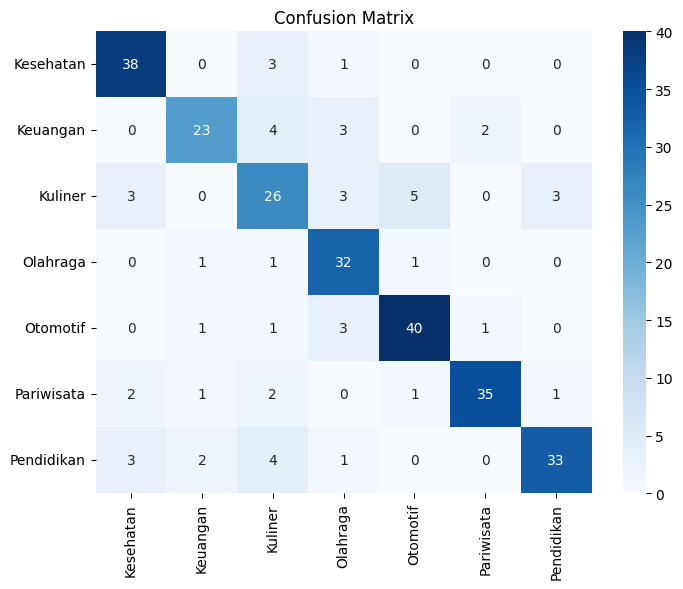

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediksi label dari data uji
label_prediksi = model.predict(padded_test)
label_prediksi = [list(prediksi).index(max(prediksi)) for prediksi in label_prediksi]

# Konversi one-hot encoded labels menjadi label kelas tunggal
label_asli = [list(label).index(1) for label in label_test]

# Buat confusion matrix
cm = confusion_matrix(label_asli, label_prediksi)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Kesehatan', 'Keuangan', 'Kuliner','Olahraga','Otomotif','Pariwisata','Pendidikan'], yticklabels=['Kesehatan', 'Keuangan', 'Kuliner','Olahraga','Otomotif','Pariwisata','Pendidikan'])
plt.title('Confusion Matrix')
plt.show()
     

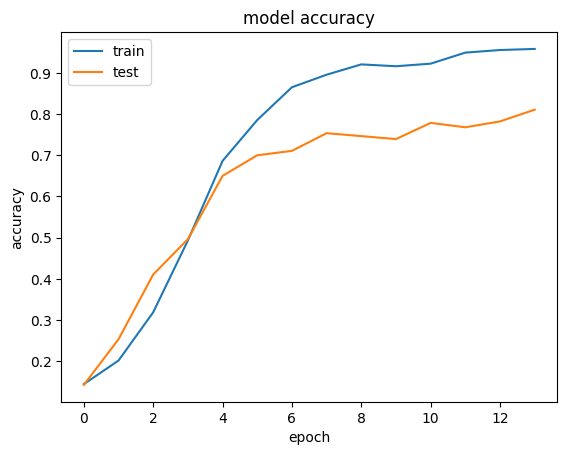

In [66]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

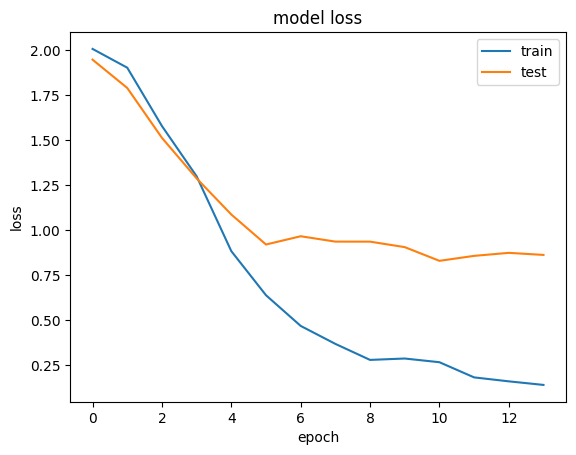

In [67]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [68]:
print(maxlen)

10


# prediksi


In [69]:
# Simpan model
model.save("model_berita_classification.h5")

# Simpan tokenizer
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Simpan nilai maxlen
with open('maxlen.txt', 'w') as f:
    f.write(str(maxlen))

In [70]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle

# Load tokenizer
with open('/kaggle/working/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Load model
model = load_model('/kaggle/working/model_berita_classification.h5')
# Load maxlen
with open('maxlen.txt', 'r') as f:
    maxlen = int(f.read())


# Contoh data baru yang ingin diprediksi
data_baru =  ["Rinov Rivaldy/Pitha Haningtyas Mentari terhenti di semifinal Thailand Open 2024"]

# Preprocessing data baru
sekuens_data_baru = tokenizer.texts_to_sequences(data_baru)
padded_data_baru = pad_sequences(sekuens_data_baru, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

# Prediksi
hasil_prediksi = model.predict(padded_data_baru)



# Hasil prediksi
print(hasil_prediksi)
categories = ['Kesehatan', 'Keuangan', 'Kuliner', 'Olahraga', 'Otomotif', 'Pariwisata', 'Pendidikan']

# Mengambil indeks probabilitas tertinggi
indeks_tertinggi = np.argmax(hasil_prediksi)

# Mendapatkan kategori sesuai dengan indeks tertinggi
kategori_prediksi = categories[indeks_tertinggi]

print("Kategori Prediksi:", kategori_prediksi)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
[[0.5980875  0.58963263 0.5546334  0.91201985 0.61612624 0.32715222
  0.40022725]]
Kategori Prediksi: Olahraga


In [71]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 10, 8)          │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,561 (404.54 KB)

 Trainable params: 103,559 (404.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Contoh input
inputs = np.array([-2, -1, 7, 1, 2])

# Mendapatkan output dari fungsi sigmoid
outputs = sigmoid(inputs)

print("Inputs:", inputs)
print("Sigmoid Outputs:", outputs)
